#Fraud Detection Task

In [ ]:
#Fraud Detection Task

###Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data summary
This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.


Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.


###Load Dataset

In [ ]:
df = pd.read_csv('Fraud.csv')

###Column Summary
`step` - Maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

`type` - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

`amount` - Amount of the transaction in local currency.

`nameOrig` - Customer who started the transaction

`oldbalanceOrg` - Initial balance before the transaction

`newbalanceOrig` - New balance after the transaction

`nameDest` - Customer who is the recipient of the transaction

`oldbalanceDest` - Initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

`newbalanceDest` - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

`isFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

`isFlaggedFraud` - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Create a copy of data

In [ ]:
new_df = df.copy()

###Pre Processing

In [ ]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
new_df.shape

(6362620, 11)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
new_df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
new_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
new_df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
new_df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


###Visulization

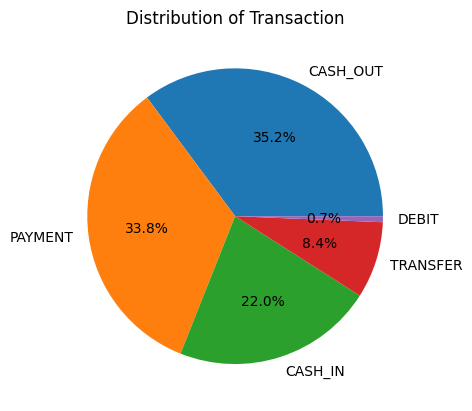

In [ ]:
plt.pie(new_df['type'].value_counts(), labels=new_df['type'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Transaction")
plt.show()

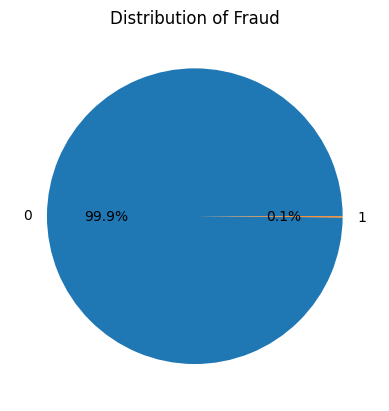

In [ ]:
plt.pie(new_df['isFraud'].value_counts(), labels=new_df['isFraud'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Fraud")
plt.show()

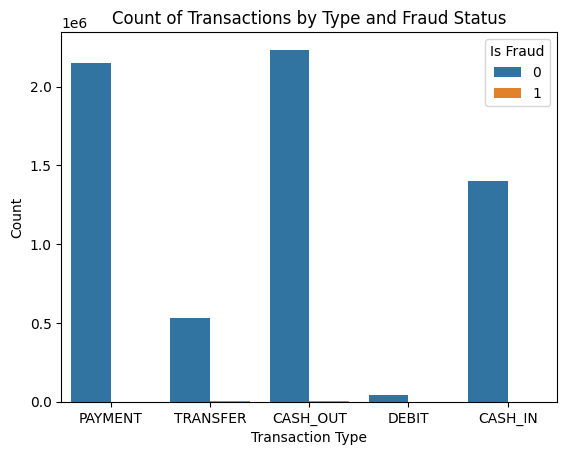

In [ ]:
sns.countplot(data=new_df, x='type', hue='isFraud')
plt.title('Count of Transactions by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df['type_encoded'] = le.fit_transform(new_df['type'])

In [ ]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  type_encoded    int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 582.5+ MB


###Multicolinearity

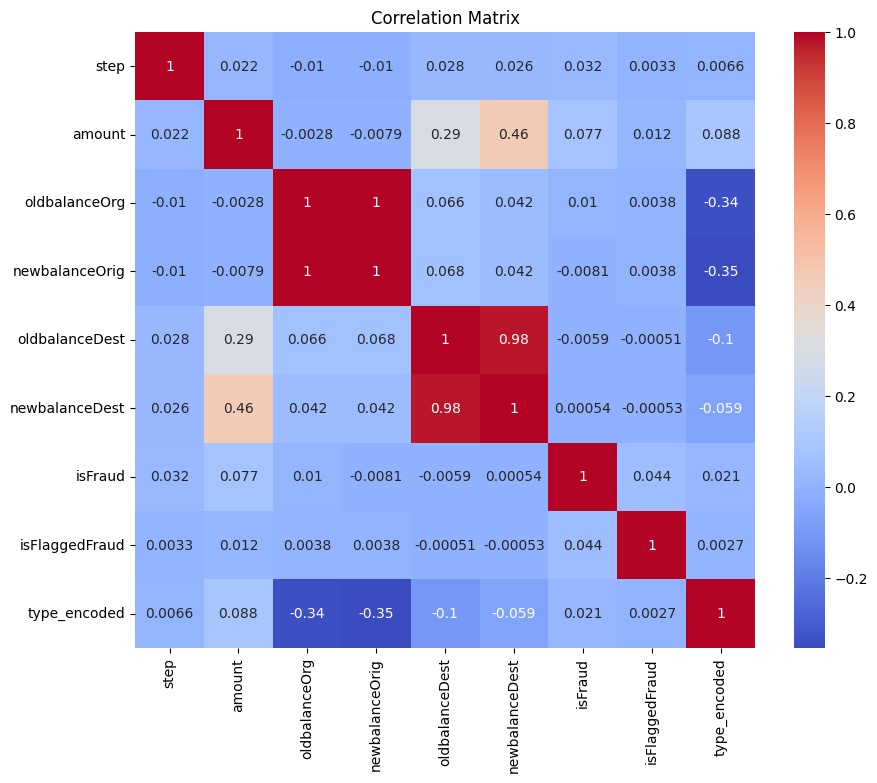

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix =new_df[new_df.select_dtypes(include=np.number).columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    numeric_data = data.select_dtypes(include=[np.number])
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif_data
calculate_vif(new_df)

,Feature,VIF
0,step,2.250166
1,amount,4.083184
2,oldbalanceOrg,564.439294
3,newbalanceOrig,568.748454
4,oldbalanceDest,73.127671
5,newbalanceDest,84.820467
6,isFraud,1.194160
7,isFlaggedFraud,1.002565
8,type_encoded,2.085348


In [ ]:
new_df['avgbalanceOrg'] = (df['oldbalanceOrg'] + df['newbalanceOrig']) / 2
new_df['avgbalanceDest'] = (df['oldbalanceDest'] + df['newbalanceDest']) / 2

In [ ]:
new_df = new_df.drop(columns=['oldbalanceOrg', 'newbalanceOrig',  'oldbalanceDest', 'newbalanceDest',])

##Remove Multicolinearity

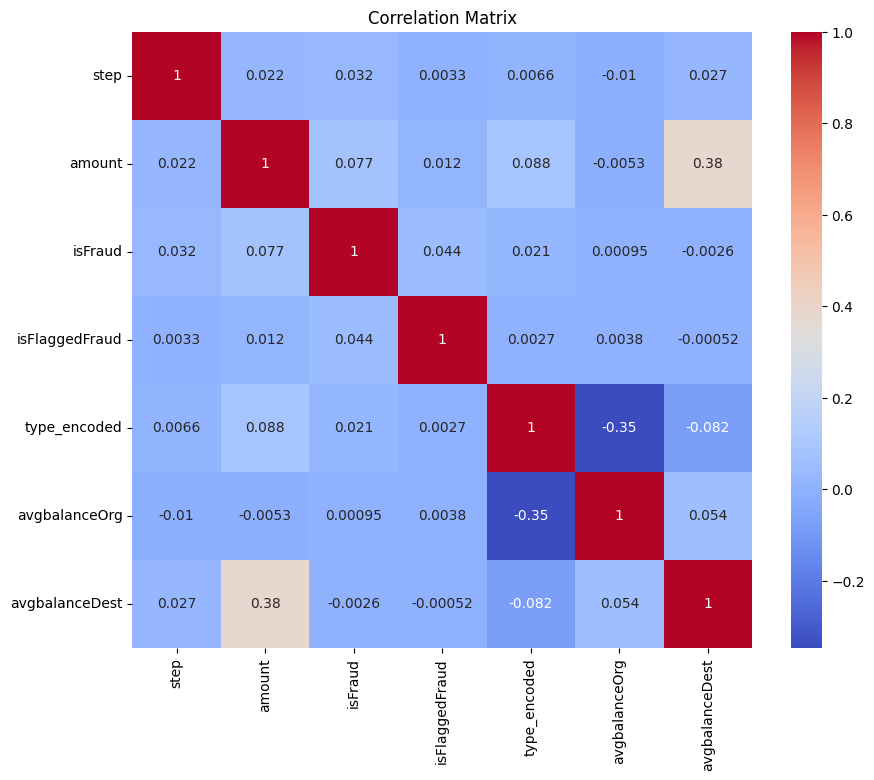

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix =new_df[new_df.select_dtypes(include=np.number).columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
def calculate_vif(data):
    numeric_data = data.select_dtypes(include=[np.number])
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif_data
calculate_vif(new_df)

,Feature,VIF
0,step,2.124612
1,amount,1.306174
2,isFraud,1.011013
3,isFlaggedFraud,1.002061
4,type_encoded,1.991681
5,avgbalanceOrg,1.113350
6,avgbalanceDest,1.297716


##Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
new_df

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_encoded,avgbalanceOrg,avgbalanceDest
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0,3,165216.180,0.000
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,3,20316.860,0.000
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0,4,90.500,0.000
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0,1,90.500,10591.000
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0,3,35719.930,0.000
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,C776919290,1,0,1,169841.065,169841.065
6362616,743,TRANSFER,6311409.28,C1529008245,C1881841831,1,0,4,3155704.640,0.000
6362617,743,CASH_OUT,6311409.28,C1162922333,C1365125890,1,0,1,3155704.640,3224193.475
6362618,743,TRANSFER,850002.52,C1685995037,C2080388513,1,0,4,425001.260,0.000


##Feature Selection

In [ ]:
X = new_df[['type_encoded', 'amount']]
y = new_df['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 2)
(1272524, 2)
(5090096,)
(1272524,)


##Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.78774467122035


In [ ]:
cm_dt = confusion_matrix( y_test, y_pred_dt)
print(cm_dt)

[[1269574    1330]
 [   1371     249]]


In [ ]:
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.16      0.15      0.16      1620

    accuracy                           1.00   1272524
   macro avg       0.58      0.58      0.58   1272524
weighted avg       1.00      1.00      1.00   1272524



##Questions and Answers

1. How did you select variables to be included in the model?
  
    Using the VIF values and correlation heatmap. Drop the attributes which are least corelated to the isFraud attribute.

2. What are the key factors that predict fraudulent customer?
    
    Old vs. New Balance: Significant changes in account balances. Unusual high amount trasactions can be fraud.

3. Do these factors make sense? If yes, How? If not, How not?
    
    Significant changes in account balances (either large increases or decreases) can be indicative of fraud. For instance, if an account suddenly has a much lower balance after a transaction, it might signal a large unauthorized withdrawal. Fraudulent transactions often involve large amounts of money to maximize the impact before the fraud is detected.
    Certain types of transactions, like transfers, are more susceptible to fraud compared to others like regular bill payments or purchases.

4. What kind of prevention should be adopted while company update its infrastructure?

    Implement Behavioral analytics to detect anomalies in user behavior
    Use secured internet connections.
Implement Robust Backup and Recovery Plans.
Multi-Factor Authentication.
Real-Time Transaction Monitoring
5. Assuming these actions have been implemented, how would you determine if they work?

    Periodic Testing and Audits.
Performance Metrics and KPIs.